In [1]:
import pandas as pd
import matplotlib
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [2]:
weather = pd.read_csv("weather.csv", index_col = "DATE")

In [6]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.509464
ACSH       0.509413
AWND       0.260956
FMTM       0.483496
PGTM       0.374063
PRCP       0.000000
SNOW       0.000000
SNWD       0.000102
TAVG       0.669507
TMAX       0.000000
TMIN       0.000000
TSUN       0.998418
WDF1       0.509668
WDF2       0.490638
WDF5       0.494873
WDFG       0.738738
WDFM       0.999949
WESD       0.690271
WSF1       0.509515
WSF2       0.490638
WSF5       0.494924
WSFG       0.619254
WSFM       0.999949
WT01       0.629764
WT02       0.935105
WT03       0.932861
WT04       0.982501
WT05       0.981430
WT06       0.990766
WT07       0.994490
WT08       0.798888
WT09       0.992858
WT11       0.999286
WT13       0.888526
WT14       0.954747
WT15       0.997857
WT16       0.664456
WT17       0.996939
WT18       0.940462
WT19       0.999949
WT21       0.999745
WT22       0.997500
WV01       0.999949
dtype: float64

In [5]:
valid_columns = weather.columns[null_pct < .05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [7]:
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2023-08-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,83,68
2023-08-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,74,67
2023-08-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,81,67


In [8]:
weather = weather.ffill()
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [9]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [10]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-26',
       '2023-08-27', '2023-08-28', '2023-08-29', '2023-08-30', '2023-08-31'],
      dtype='object', name='DATE', length=19601)

In [12]:
weather.index = pd.to_datetime(weather.index)

In [13]:
weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    243
Name: count, dtype: int64

<Axes: xlabel='DATE'>

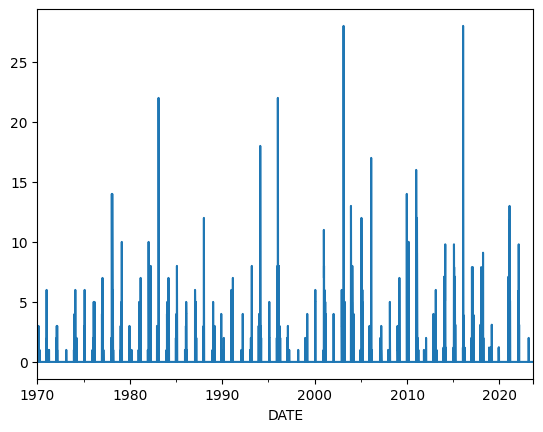

In [14]:
weather["snwd"].plot()


In [15]:
weather["target"] = weather.shift(-1)["tmax"]

In [16]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2023-08-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,83,68,74.0
2023-08-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,74,67,81.0
2023-08-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,81,67,85.0


In [17]:
weather = weather.ffill()
#Check for collinearity
weather.corr(numeric_only=True)

,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.150445,0.001331,-0.007229,0.052530,-0.003265
snow,0.150445,1.000000,0.232779,-0.174126,-0.158320,-0.171813
snwd,0.001331,0.232779,1.000000,-0.258230,-0.255181,-0.239534
tmax,-0.007229,-0.174126,-0.258230,1.000000,0.955235,0.915060
tmin,0.052530,-0.158320,-0.255181,0.955235,1.000000,0.915203
target,-0.003265,-0.171813,-0.239534,0.915060,0.915203,1.000000


In [18]:
rr = Ridge(alpha=.1)

predictors = weather.columns[~weather.columns.isin(["target","name","station"])]

In [19]:
def backtest(weather, model, predictors, start=3650, step = 90):
    all_predictions = []
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"],preds],axis = 1)
        
        combined.columns = ["actual", "prediction"]
        
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
        
    return pd.concat(all_predictions)

In [20]:
predictions = backtest(weather, rr, predictors)

In [21]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2023-08-27,74.0,82.046398,8.046398
2023-08-28,81.0,77.497127,3.502873
2023-08-29,85.0,80.633824,4.366176


In [22]:
mean_absolute_error(predictions["actual"],predictions["prediction"])

5.1398737696393715

In [23]:
def pct_diff(old, new):
    return (new - old) / old

In [24]:
def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

In [25]:
rolling_horizons = [3,14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [26]:
weather = weather.iloc[14:,:]

In [27]:
weather = weather.fillna(0)

In [33]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,29,13,36.0,29.666667,-0.022472,...,18.857143,-0.310606,0.022857,-1.000000,29.000000,29.000000,13.000000,13.000000,0.000000,0.000000
1970-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,21,43.0,30.333333,0.186813,...,18.785714,0.117871,0.022857,-1.000000,32.500000,36.000000,17.000000,21.000000,0.000000,0.000000
1970-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,43,30,42.0,36.000000,0.194444,...,19.142857,0.567164,0.022857,-0.125000,36.000000,43.000000,21.333333,30.000000,0.006667,0.020000
1970-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.10,0.0,0.0,42,25,25.0,40.333333,0.041322,...,19.285714,0.296296,0.030000,2.333333,37.500000,42.000000,22.250000,25.000000,0.030000,0.100000
1970-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,25,16,24.0,36.666667,-0.318182,...,18.928571,-0.154717,0.030000,-1.000000,35.000000,25.000000,21.000000,16.000000,0.024000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,83,68,74.0,82.000000,0.012195,...,67.714286,0.004219,0.112857,-1.000000,82.477844,82.703704,68.234731,68.074074,0.124174,0.158704
2023-08-28,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,74,67,81.0,81.000000,-0.086420,...,67.571429,-0.008457,0.112857,-1.000000,82.472771,81.611111,68.233992,67.777778,0.124099,0.270000
2023-08-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,81,67,85.0,79.333333,0.021008,...,67.285714,-0.004246,0.089286,-1.000000,82.471890,81.851852,68.233254,67.722222,0.124025,0.105556


In [28]:
def expand_mean(df):
    return df.expanding(1).mean()

In [29]:
for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys = False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys = False).apply(expand_mean)


In [30]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]

In [31]:
predictions = backtest(weather, rr, predictors)

In [32]:
mean_absolute_error(predictions["actual"],predictions["prediction"])

4.792356579046591